In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("su-d-01.01-vz1850-ge-01.csv", sep=";",encoding='unicode_escape')
df.head()

,Jahr,Gemeindenummer,Gemeindename,Bezirksnummer,Bezirksname,Kantonsnummer,Kanton,Kantonsname,Zähleinheit,Anzahl
0,1850,1,Aeugst,101,Affoltern,1,ZH,Zürich,Einwohnerinnen und Einwohner - Total,647.0
1,1850,1,Aeugst,101,Affoltern,1,ZH,Zürich,Staatsangehörigkeit - Schweiz,646.0
2,1850,1,Aeugst,101,Affoltern,1,ZH,Zürich,Staatsangehörigkeit - Ausland,1.0
3,1850,1,Aeugst,101,Affoltern,1,ZH,Zürich,Geschlecht - Mann,320.0
4,1850,1,Aeugst,101,Affoltern,1,ZH,Zürich,Geschlecht - Frau,327.0


In [3]:
def colInfo(df, column):
  print("Column: "+column)
  total = len(df.values)
  print(f"Number of unique values: {len(df[column].unique())}")
  
  return None

_ = [colInfo(df, c) for c in ['Jahr', 'Gemeindename', 'Bezirksname', 'Kantonsname', 'Zähleinheit']]

Column: Jahr
Number of unique values: 18
Column: Gemeindename
Number of unique values: 3623
Column: Bezirksname
Number of unique values: 242
Column: Kantonsname
Number of unique values: 26
Column: Zähleinheit
Number of unique values: 53


In [4]:
total_EinwohnerSchweiz = df[df["Zähleinheit"] == 'Staatsangehörigkeit - Schweiz']
total_EinwohnerSchweiz

,Jahr,Gemeindenummer,Gemeindename,Bezirksnummer,Bezirksname,Kantonsnummer,Kanton,Kantonsname,Zähleinheit,Anzahl
1,1850,1,Aeugst,101,Affoltern,1,ZH,Zürich,Staatsangehörigkeit - Schweiz,646.0
9,1850,2,Affoltern am Albis,101,Affoltern,1,ZH,Zürich,Staatsangehörigkeit - Schweiz,1839.0
17,1850,3,Bonstetten,101,Affoltern,1,ZH,Zürich,Staatsangehörigkeit - Schweiz,873.0
25,1850,4,Hausen,101,Affoltern,1,ZH,Zürich,Staatsangehörigkeit - Schweiz,1440.0
33,1850,5,Hedingen,101,Affoltern,1,ZH,Zürich,Staatsangehörigkeit - Schweiz,992.0
...,...,...,...,...,...,...,...,...,...,...
1253210,2015,6806,Vendlincourt,2603,Porrentruy,26,JU,Jura,Staatsangehörigkeit - Schweiz,517.0
1253233,2015,6807,Basse-Allaine,2603,Porrentruy,26,JU,Jura,Staatsangehörigkeit - Schweiz,1140.0
1253256,2015,6808,Clos du Doubs,2603,Porrentruy,26,JU,Jura,Staatsangehörigkeit - Schweiz,1203.0
1253279,2015,6809,Haute-Ajoie,2603,Porrentruy,26,JU,Jura,Staatsangehörigkeit - Schweiz,862.0


In [5]:
Schweizer_pro_Jahr = total_EinwohnerSchweiz.groupby(['Jahr'])['Anzahl'].sum().reset_index()

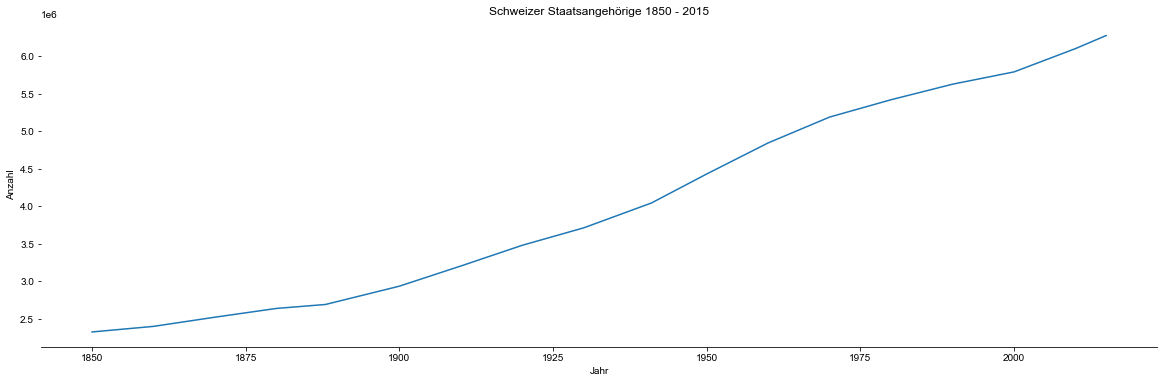

In [6]:
fig_dims = (20, 6)
fig, ax = plt.subplots(figsize=fig_dims)
ax.set_title('Schweizer Staatsangehörige 1850 - 2015')
sns.set_style('white')
sns.despine(left=True)
sns.lineplot(data=Schweizer_pro_Jahr, x="Jahr", y="Anzahl")
plt.show()

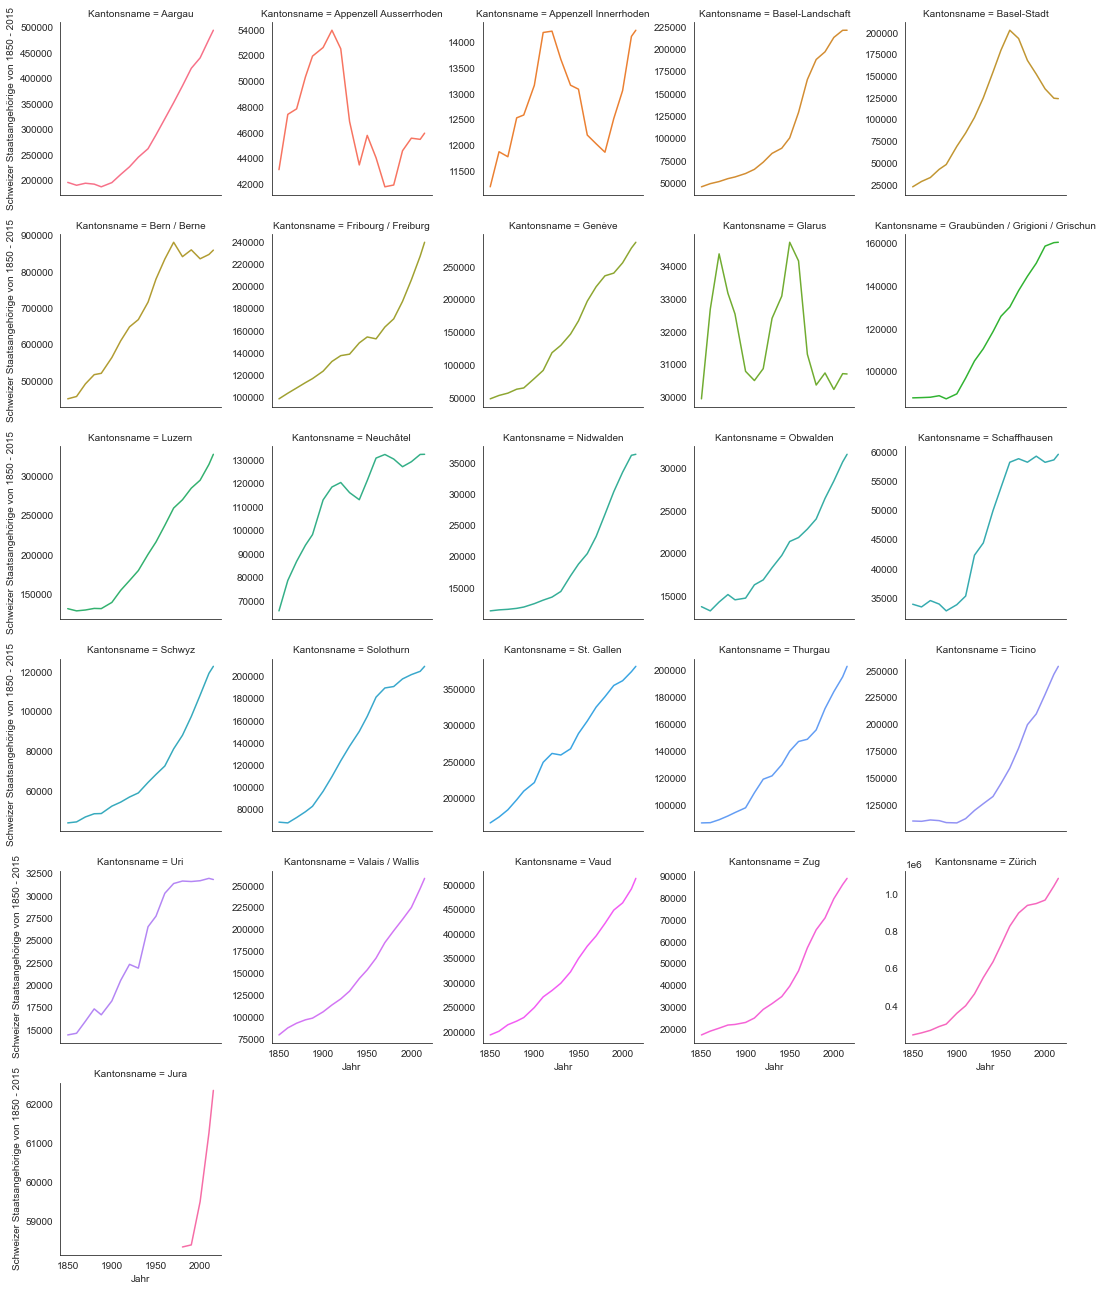

In [7]:
Schweizer_pro_Jahr_pro_Kanton = total_EinwohnerSchweiz.groupby(['Jahr','Kantonsname'])['Anzahl'].sum().reset_index()

graphGDP = sns.FacetGrid(Schweizer_pro_Jahr_pro_Kanton, col="Kantonsname", col_wrap=5,
                      hue = "Kantonsname", sharey = False)

graphGDP = (graphGDP.map(sns.lineplot,"Jahr","Anzahl")
         .set_axis_labels("Jahr","Schweizer Staatsangehörige von 1850 - 2015"))

graphGDP;
